In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize_scalar
from random import seed
from BikeTrackingWithDynamicWithoutStateRestore import BikeTrackingWithDynamicWithoutStateRestore
from oomodelling.ModelSolver import ModelSolver


In [108]:
m = BikeTrackingWithDynamicWithoutStateRestore()
m.tolerance = 0.2
m.horizon = 5.0
m.cooldown = 5.0
m.nsamples = 10
m.max_iterations = 20
m.time_step = 0.1
m.conv_xatol = 1e3
m.conv_fatol = 0.01

m.to_track.ddriver.nperiods = 2
t0 = 0
tf = 60
ModelSolver().simulate(m, t0, tf, 0.1)

  message: 'The solver successfully reached the end of the integration interval.'
     nfev: 577208
     njev: 0
      nlu: 0
      sol: None
   status: 0
  success: True
        t: array([0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
       5.99987198e+01, 5.99994127e+01, 6.00000000e+01])
 t_events: None
        y: array([[0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
        5.99987198e+01, 5.99994127e+01, 6.00000000e+01],
       [0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
        5.99987198e+01, 5.99994127e+01, 6.00000000e+01],
       [0.00000000e+00, 4.70933587e-04, 5.18026946e-03, ...,
        5.99987198e+01, 5.99994127e+01, 6.00000000e+01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.90847738e-16, 1.90717666e-16, 1.90607482e-16],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.71517662e+00, 2.71517662e+00, 2.71517662e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.33

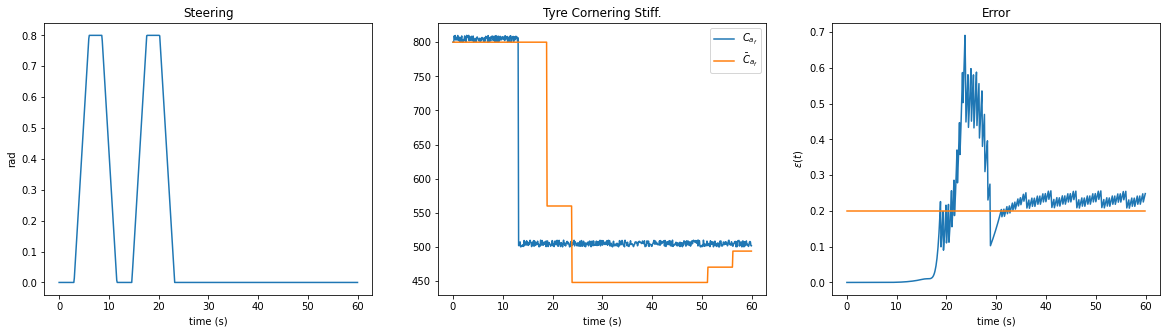

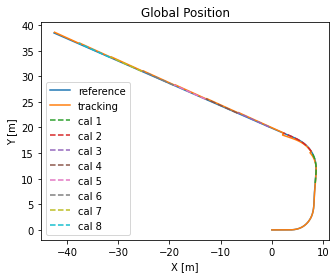

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (ax1,ax2,ax3) = plt.subplots(1,3)
#fig.tight_layout()

   
# steering
ax1.set_title("Steering")
ax1.plot(m.signals['time'], m.to_track.ddriver.signals['steering'],
           label='steering')
ax1.set_xlabel("time (s)")
ax1.set_ylabel("rad")


ax2.set_title("Tyre Cornering Stiff.")
ax2.plot(m.to_track.dbike.signals['time'], m.to_track.dbike.signals['Caf'], label=r'$C_{a_f}$')
ax2.plot(m.tracking.signals['time'], m.tracking.signals['Caf'], label=r'$\bar{C}_{a_f}$')
ax2.set_xlabel("time (s)")
ax2.legend()

ax3.set_title("Error")
ax3.plot(m.signals['time'], m.signals['error'],label='error')
ax3.plot(m.signals['time'], [m.tolerance for t in m.signals['time']], label='tolerance')
ax3.set_xlabel("time (s)")
ax3.set_ylabel(r"$\epsilon (t)$")
ax2.legend()




fig.set_figheight(5) 
fig.set_figwidth(20)
plt.savefig('tracking_steer_error_stiff.pdf',format='pdf')




# position 
fig,ax = plt.subplots(1,1)
ax.set_title("Global Position")
ax.plot(m.to_track.dbike.signals['X'], m.to_track.dbike.signals['Y'],
           label='reference')
ax.plot(m.tracking.signals['X'], m.tracking.signals['Y'], label='tracking')
for idx, calib in enumerate(m.recalibration_history):
    ax.plot(calib.xs[m.X_idx, :], calib.xs[m.Y_idx, :], '--', label=f'cal {idx+1}')
ax.set_xlabel("X [m]")
ax.set_ylabel("Y [m]")
ax.legend()
ax.set_aspect('equal')

plt.savefig('tracking_position.pdf',format='pdf')

